<a href="https://colab.research.google.com/github/GoldHood/IA_NN_Projects_Colab/blob/main/placas_peru_Yolo11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚗🔍 Detección de Placas Vehiculares Peruanas con YOLOv11 🎉

**Bienvenidos estudiantes!** 👩‍🎓👨‍🎓
En este notebook aprenderemos paso a paso a:

1. Crear y configurar un entorno de trabajo. 🛠️
2. Preparar y validar el dataset de placas peruanas. 📁
3. Entrenar un modelo YOLOv11 y ajustar hiperparámetros. 🎯
4. Evaluar métricas de desempeño: Precision, Recall, mAP. 📈
5. Realizar inferencias y visualizar resultados. 🖼️

> **Objetivo educativo:** Comprender en detalle cada línea de código y el proceso completo de detección de objetos con YOLOv11.

¡Comencemos este viaje de aprendizaje! 🚀🔔

## 📦 Importación de Librerías Fundamentales para YOLOv11 🚗🔍

Antes de iniciar con la detección de placas vehiculares peruanas, necesitamos importar un conjunto de librerías esenciales. Estas herramientas permitirán manipular datos, procesar imágenes, graficar resultados y validar la estructura del dataset.

Estas librerías son utilizadas a lo largo de todo el proyecto y están directamente relacionadas con el desarrollo del **Ejercicio 2: Detección de Placas Vehiculares Peruanas** del examen parcial. 🎓

---

### 🔹 `numpy` ➕  
**¿Qué es?**  
Librería especializada en cálculos numéricos y manipulación de matrices (arreglos multidimensionales).

**¿Cómo se usa aquí?**  
- Para trabajar con las coordenadas de las cajas de detección (bounding boxes).  
- Para normalizar datos y aplicar operaciones matemáticas sobre vectores de predicción.

---

### 🔹 `pandas` 📊  
**¿Qué es?**  
Librería para análisis y manipulación de datos en estructuras tabulares (como archivos `.csv`).

**¿Cómo se usa aquí?**  
- Leer y analizar el archivo `results.csv` que contiene las métricas del entrenamiento de YOLO (precisión, recall, mAP).  
- Visualizar resultados por época y facilitar el análisis de desempeño del modelo.

---

### 🔹 `os` 🗂️  
**¿Qué es?**  
Módulo de Python que permite interactuar con el sistema de archivos del computador.

**¿Cómo se usa aquí?**  
- Verificar si todas las imágenes tienen su correspondiente archivo de etiqueta (`.txt`).  
- Automatizar la revisión de carpetas (`train`, `valid`, `test`) y detectar inconsistencias.

---

### 🔹 `matplotlib.pyplot` 📈  
**¿Qué es?**  
Herramienta para crear gráficos estáticos e interactivos en Python.

**¿Cómo se usa aquí?**  
- Graficar la evolución de métricas como precisión y mAP durante el entrenamiento.  
- Visualizar el comportamiento del modelo para detectar problemas como overfitting o underfitting.

---

### 🔹 `PIL.Image` 🖼️  
**¿Qué es?**  
Librería del módulo PIL (Python Imaging Library) usada para cargar, mostrar y procesar imágenes.

**¿Cómo se usa aquí?**  
- Cargar y mostrar imágenes con placas detectadas por el modelo YOLO.  
- Validar visualmente si las predicciones del modelo son correctas.

---

## 🧠 Relación con el Ejercicio 2 del Examen Parcial

Estas librerías están directamente conectadas con los entregables solicitados:

| Elemento Evaluado 📋                             | ¿Qué librería ayuda?          | Función que cumple |
|--------------------------------------------------|-------------------------------|---------------------|
| Código fuente bien comentado                     | `numpy`, `os`, `pandas`       | Manipular datos y carpetas |
| Reporte de métricas y ejemplos de detección      | `pandas`, `matplotlib.pyplot` | Leer resultados y graficarlos |
| Visualización de detecciones                     | `PIL.Image`                   | Mostrar imágenes procesadas |
| Análisis de desempeño y validación del modelo    | `pandas`, `matplotlib`, `os`  | Evaluar el comportamiento del modelo |

---

Estas herramientas son la base del flujo de trabajo en todo proyecto de visión por computadora con YOLOv11. ¡ Al aprender a usarlas nos permite construir sistemas inteligentes con aplicaciones reales! 🚀🔍📸



In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import Image

# 1) Crear entorno con Python 3.10

In [ ]:
!pip install split-folders pillow ultralytics
!pip install roboflow

  Using cached ultralytics-8.3.141-py3-none-any.whl.metadata (37 kB)
  Using cached ultralytics_thop-2.0.14-py3-none-any.whl.metadata (9.4 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
Using cached ultralytics-8.3.141-py3-none-any.whl (1.0 MB)
Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl (363.4 MB)
Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl (664.8 MB)
Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl (127.9 MB)
Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl (207.5 MB)
Using cached ultralytics_thop-2.0.14-py3-none-any.whl (26 kB)
  

In [ ]:

from roboflow import Roboflow
rf = Roboflow(api_key="bWdjQu8RfOZOkj6aC55m")
project = rf.workspace("grupo-6-placas").project("peru-plate-numbers")
version = project.version(3)
dataset = version.download("yolov11")









loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Peru-Plate-Numbers-3 in yolov11:: 100%|██████████| 3292/3292 [00:19<00:00, 169.94it/s] 


In [ ]:
# Specify the path to the file
file_path = '/content/Peru-Plate-Numbers-3/data.yaml'

# Check if the file exists
if os.path.exists(file_path):
    print(f"The file at {file_path} exists.")
else:
    print(f"The file at {file_path} does not exist.")

The file at /content/Peru-Plate-Numbers-3/data.yaml exists.


In [ ]:
# Get the current working directory
cwd = os.getcwd()
print(f"Current working directory: {cwd}")

# List all files and directories in the current directory
files = os.listdir(cwd)
print(f"Files and directories in '{cwd}': {files}")


Current working directory: /content
Files and directories in '/content': ['.config', 'Peru-Plate-Numbers-3', 'sample_data']


In [ ]:
dir_path = cwd + "/sample_data"
for files in os.listdir(dir_path):
  os.remove(dir_path + "/" + files)
os.rmdir(dir_path)

In [ ]:
from ultralytics import YOLO
model = YOLO("yolo11n.pt")
model.info()

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 126MB/s]


YOLO11n summary: 181 layers, 2,624,080 parameters, 0 gradients, 6.6 GFLOPs


(181, 2624080, 0, 6.614336)

In [ ]:
from ultralytics import settings

# View all settings

settings.update({'datasets_dir': '/content/Peru-Plate-Numbers-3'})

In [13]:
# os.chdir("/content")
# Entrenar el modelo
model.train(
    data='/content/Peru-Plate-Numbers-3/data.yaml',
    epochs=30,
    imgsz=640,
    batch=16,  # Ajusta según tu GPU
    name="entrenamiento_placas",
    project="proyecto_placas"
)

Ultralytics 8.3.141 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Peru-Plate-Numbers-3/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=entrenamiento_placas, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True,

100%|██████████| 755k/755k [00:00<00:00, 90.6MB/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

  8                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  9                  -1  1    164608  ultralytics.nn.modules.block.SPPF            [256, 256, 5]                 
 10                  -1  1    249728  ultralytics.nn.modules.block.C2PSA           [256, 256, 1]                 
 11                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 12             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 13                  -1  1    111296  ultralytics.nn.modules.block.C3k2            [384, 128, 1, False]          
 14                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 15             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 16                  -1  1     32096  ultralytics.nn.modules.block.C3k2            [256,

train: Scanning /content/Peru-Plate-Numbers-3/train/labels... 1470 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1470/1470 [00:01<00:00, 1126.95it/s]


train: New cache created: /content/Peru-Plate-Numbers-3/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3038.7±1042.4 MB/s, size: 1275.3 KB)


val: Scanning /content/Peru-Plate-Numbers-3/valid/labels... 138 images, 0 backgrounds, 0 corrupt: 100%|██████████| 138/138 [00:00<00:00, 1807.34it/s]

val: New cache created: /content/Peru-Plate-Numbers-3/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 240, len(boxes) = 257. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to proyecto_placas/entrenamiento_placas/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to proyecto_placas/entrenamiento_placas
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30         0G      1.669       3.28     0.9887         38        640: 100%|██████████| 92/92 [21:35<00:00, 14.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:43<00:00,  8.68s/it]

                   all        138        257     0.0531       0.12      0.221      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30         0G      1.525      1.863     0.9428         65        640: 100%|██████████| 92/92 [21:26<00:00, 13.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:39<00:00,  7.89s/it]

                   all        138        257      0.779      0.847      0.889      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30         0G      1.522      1.525     0.9455         54        640: 100%|██████████| 92/92 [21:14<00:00, 13.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:36<00:00,  7.26s/it]

                   all        138        257       0.88      0.865      0.927      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30         0G      1.493      1.301     0.9486         54        640: 100%|██████████| 92/92 [21:04<00:00, 13.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:37<00:00,  7.48s/it]

                   all        138        257      0.873      0.896      0.918      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30         0G      1.466      1.141     0.9366         44        640: 100%|██████████| 92/92 [20:35<00:00, 13.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:39<00:00,  7.89s/it]

                   all        138        257      0.899      0.748      0.836      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30         0G      1.433      1.045     0.9394         45        640: 100%|██████████| 92/92 [20:43<00:00, 13.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:36<00:00,  7.22s/it]

                   all        138        257      0.828      0.784      0.836      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30         0G      1.423       1.03     0.9285         36        640: 100%|██████████| 92/92 [20:39<00:00, 13.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:39<00:00,  7.84s/it]

                   all        138        257      0.874       0.92      0.925      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30         0G        1.4     0.9892      0.928         55        640: 100%|██████████| 92/92 [21:00<00:00, 13.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:36<00:00,  7.30s/it]

                   all        138        257      0.923      0.925      0.942      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30         0G       1.38     0.9508     0.9136         51        640: 100%|██████████| 92/92 [20:46<00:00, 13.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:37<00:00,  7.51s/it]

                   all        138        257      0.879      0.917      0.935      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30         0G      1.342     0.9286     0.9107         51        640: 100%|██████████| 92/92 [20:43<00:00, 13.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:36<00:00,  7.25s/it]

                   all        138        257       0.87      0.903      0.919      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30         0G      1.334     0.9099     0.9027         61        640: 100%|██████████| 92/92 [20:41<00:00, 13.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:37<00:00,  7.51s/it]

                   all        138        257      0.893      0.905      0.926       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30         0G      1.329     0.8866      0.898         49        640: 100%|██████████| 92/92 [20:45<00:00, 13.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:35<00:00,  7.14s/it]

                   all        138        257      0.891      0.936       0.92      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30         0G      1.304     0.8655     0.9094         37        640: 100%|██████████| 92/92 [20:49<00:00, 13.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:39<00:00,  7.93s/it]

                   all        138        257      0.914      0.944      0.942      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30         0G      1.311     0.8668     0.9071         51        640: 100%|██████████| 92/92 [20:46<00:00, 13.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:39<00:00,  7.86s/it]

                   all        138        257      0.881      0.914      0.924      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30         0G      1.298     0.8527     0.8955         39        640: 100%|██████████| 92/92 [20:59<00:00, 13.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:38<00:00,  7.79s/it]

                   all        138        257      0.906      0.952      0.941      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30         0G      1.285     0.8426     0.8926         53        640: 100%|██████████| 92/92 [20:57<00:00, 13.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:35<00:00,  7.16s/it]

                   all        138        257       0.91      0.929      0.928      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30         0G      1.282     0.8491     0.9033         56        640: 100%|██████████| 92/92 [20:57<00:00, 13.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:39<00:00,  7.86s/it]

                   all        138        257      0.884      0.941      0.934      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30         0G      1.261     0.8495      0.889         41        640: 100%|██████████| 92/92 [21:02<00:00, 13.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:39<00:00,  7.86s/it]

                   all        138        257      0.888      0.935      0.918      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30         0G      1.249     0.8276     0.8846         36        640: 100%|██████████| 92/92 [21:01<00:00, 13.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:40<00:00,  8.09s/it]

                   all        138        257      0.944      0.886      0.951      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30         0G      1.234     0.8316     0.8884         40        640: 100%|██████████| 92/92 [21:08<00:00, 13.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:40<00:00,  8.09s/it]

                   all        138        257      0.907      0.925      0.954      0.572


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30         0G      1.188     0.8355      0.894         25        640: 100%|██████████| 92/92 [21:08<00:00, 13.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:38<00:00,  7.73s/it]

                   all        138        257      0.927      0.897      0.945      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30         0G      1.197     0.8154     0.8968         28        640: 100%|██████████| 92/92 [21:06<00:00, 13.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:39<00:00,  7.97s/it]

                   all        138        257       0.94      0.918      0.958      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30         0G      1.171     0.8053     0.8855         25        640: 100%|██████████| 92/92 [21:10<00:00, 13.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:37<00:00,  7.51s/it]

                   all        138        257      0.959      0.943      0.952      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30         0G      1.166     0.8109      0.877         30        640: 100%|██████████| 92/92 [21:13<00:00, 13.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:39<00:00,  7.85s/it]

                   all        138        257      0.929       0.94      0.952      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30         0G      1.134     0.8078     0.8748         29        640: 100%|██████████| 92/92 [21:11<00:00, 13.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:39<00:00,  7.87s/it]

                   all        138        257      0.953      0.936      0.961      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30         0G      1.134     0.8029     0.8789         20        640: 100%|██████████| 92/92 [21:07<00:00, 13.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:39<00:00,  7.86s/it]

                   all        138        257      0.934      0.951      0.948      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30         0G      1.124     0.7767     0.8694         29        640: 100%|██████████| 92/92 [21:07<00:00, 13.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:38<00:00,  7.73s/it]

                   all        138        257      0.947       0.94      0.961      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30         0G      1.127     0.7889     0.8683         24        640: 100%|██████████| 92/92 [21:08<00:00, 13.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:39<00:00,  7.96s/it]

                   all        138        257      0.959       0.93      0.953      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30         0G      1.119     0.7731     0.8698         22        640: 100%|██████████| 92/92 [21:13<00:00, 13.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:37<00:00,  7.46s/it]

                   all        138        257      0.949      0.937      0.948      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30         0G      1.106     0.7763     0.8761         37        640: 100%|██████████| 92/92 [21:14<00:00, 13.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:39<00:00,  7.87s/it]

                   all        138        257      0.946      0.931       0.95      0.662



30 epochs completed in 10.835 hours.
Optimizer stripped from proyecto_placas/entrenamiento_placas/weights/last.pt, 5.5MB
Optimizer stripped from proyecto_placas/entrenamiento_placas/weights/best.pt, 5.5MB

Validating proyecto_placas/entrenamiento_placas/weights/best.pt...
Ultralytics 8.3.141 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:36<00:00,  7.21s/it]


                   all        138        257       0.94      0.918      0.958      0.673
                 Placa        106        203       0.93      0.855      0.927      0.591
                 placa         32         54      0.949      0.981      0.988      0.755
Speed: 2.6ms preprocess, 188.2ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to proyecto_placas/entrenamiento_placas


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fbe1f4ad150>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
import os

# Listar archivos en el directorio
directory = "/content/proyecto_placas/entrenamiento_placas2"
if os.path.exists(directory):
    print("Archivos en el directorio:")
    print(os.listdir(directory))
else:
    print(f"El directorio {directory} no existe.")

Archivos en el directorio:
['confusion_matrix.png', 'val_batch2_labels.jpg', 'args.yaml', 'results.png', 'F1_curve.png', 'val_batch2_pred.jpg', 'val_batch0_pred.jpg', 'confusion_matrix_normalized.png', 'train_batch2.jpg', 'val_batch1_labels.jpg', 'weights', 'train_batch0.jpg', 'labels_correlogram.jpg', 'R_curve.png', 'val_batch1_pred.jpg', 'train_batch1.jpg', 'results.csv', 'labels.jpg', 'PR_curve.png', 'val_batch0_labels.jpg', 'P_curve.png']


In [ ]:
# Crear DataFrame de métricas de entrenamiento
df_metrics = pd.read_csv("/content/proyecto_placas/entrenamiento_placas2/results.csv")


# Mostrar algunas métricas
print(df_metrics.head(5))

print(df_metrics.index.to_list())
print(df_metrics.columns.to_list())

df_metrics.describe()

   epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1  123.143         1.44594         1.90841         0.92218   
1      2  253.339         1.46145         1.66803         0.92958   
2      3  376.972         1.39414         1.45274         0.90946   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.83850            0.83903           0.90637   
1               0.84871            0.86740           0.87409   
2               0.86644            0.89518           0.93465   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.53246       1.47668       1.13380       0.89785  0.000550   
1              0.55477       1.26422       1.16604       0.86491  0.000741   
2              0.60651       1.25241       0.86818       0.85949  0.000565   

     lr/pg1    lr/pg2  
0  0.000550  0.000550  
1  0.000741  0.000741  
2  0.000565  0.000565  
[0, 1, 2]
['epoch', 'time', 'train/box_loss', 'train/cls_

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
count,3.0,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,2.0,251.151333,1.433843,1.676393,0.920407,0.851217,0.867203,0.905037,0.564580,1.331103,1.056007,0.874083,0.000618,0.000618,0.000618
std,1.0,126.928640,0.035248,0.227950,0.010177,0.014138,0.028076,0.030302,0.037987,0.126211,0.163459,0.020760,0.000106,0.000106,0.000106
min,1.0,123.143000,1.394140,1.452740,0.909460,0.838500,0.839030,0.874090,0.532460,1.252410,0.868180,0.859490,0.000550,0.000550,0.000550
25%,1.5,188.241000,1.420040,1.560385,0.915820,0.843605,0.853215,0.890230,0.543615,1.258315,1.000990,0.862200,0.000557,0.000557,0.000557
50%,2.0,253.339000,1.445940,1.668030,0.922180,0.848710,0.867400,0.906370,0.554770,1.264220,1.133800,0.864910,0.000565,0.000565,0.000565
75%,2.5,315.155500,1.453695,1.788220,0.925880,0.857575,0.881290,0.920510,0.580640,1.370450,1.149920,0.881380,0.000653,0.000653,0.000653
max,3.0,376.972000,1.461450,1.908410,0.929580,0.866440,0.895180,0.934650,0.606510,1.476680,1.166040,0.897850,0.000741,0.000741,0.000741


['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']


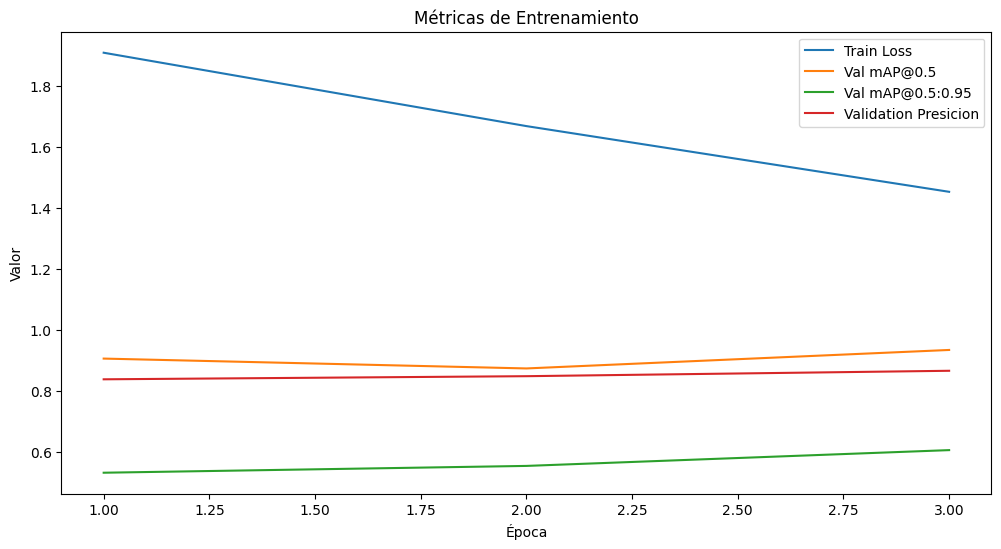

In [ ]:
print(df_metrics.columns.to_list())
# Graficar las métricas
plt.figure(figsize=(12, 6))
plt.plot(df_metrics[['epoch']], df_metrics[['train/cls_loss']], label='Train Loss')
plt.plot(df_metrics[['epoch']], df_metrics[['metrics/mAP50(B)']], label='Val mAP@0.5')
plt.plot(df_metrics[['epoch']], df_metrics[['metrics/mAP50-95(B)']], label='Val mAP@0.5:0.95')
plt.plot(df_metrics[['epoch']], df_metrics[['metrics/precision(B)']], label='Validation Presicion')
plt.xlabel('Época')
plt.ylabel('Valor')
plt.title('Métricas de Entrenamiento')
plt.legend()
plt.show()

In [ ]:
# Evaluar el modelo
results = model.val()

# Mostrar los resultados
print(results)

Ultralytics 8.3.138 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2655.5±1222.5 MB/s, size: 1984.9 KB)


val: Scanning /content/Peru-Plate-Numbers-3/valid/labels.cache... 138 images, 0 backgrounds, 0 corrupt: 100%|██████████| 138/138 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 240, len(boxes) = 257. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:34<00:00,  3.86s/it]


                   all        138        257      0.861      0.895      0.932      0.606
                 Placa        106        203      0.765      0.901      0.905      0.534
                 placa         32         54      0.957      0.889       0.96      0.679
Speed: 2.1ms preprocess, 17.9ms inference, 0.0ms loss, 4.2ms postprocess per image
Results saved to proyecto_placas/entrenamiento_placas22
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e969e34e8d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018

In [ ]:
# Cargar el modelo entrenado
# modelo_entrenado = YOLO("/content/yolov8n.pt")
modelo_entrenado = YOLO("/content/proyecto_placas/entrenamiento_placas2/weights/best.pt")

# Realizar inferencia en una imagen
resultados = modelo_entrenado.predict(source="/content/placacarro1.jpg", save=True)

# Acceder a los resultados
for resultado in resultados:
    print(f"Predicciones para la imagen: {resultado.path}")

    for caja, conf, clase in zip(resultado.boxes.xyxy, resultado.boxes.conf, resultado.boxes.cls):
        print(f"Bounding Box: {caja} - Confianza: {conf} - Clase: {clase}")


image 1/1 /content/placacarro1.jpg: 448x640 1 placa, 47.4ms
Speed: 1.9ms preprocess, 47.4ms inference, 2.6ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict
Predicciones para la imagen: /content/placacarro1.jpg
Bounding Box: tensor([129.9551, 125.6180, 183.1079, 150.5832], device='cuda:0') - Confianza: 0.6295279860496521 - Clase: 1.0


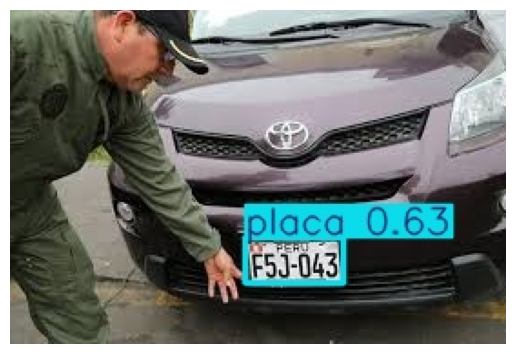

In [ ]:
# Cargar y mostrar la imagen con las predicciones
img = Image.open("/content/runs/detect/predict/placacarro1.jpg")
plt.imshow(img)
plt.axis('off')  # Ocultar los ejes
plt.show()

In [ ]:
import shutil
from google.colab import files

# Especifica el nombre de la carpeta que deseas comprimir y descargar
folder_path = "/content/proyecto_placas"  # Ruta de la carpeta en Colab
output_filename = "placas_peru_v1.zip"   # Nombre del archivo zip de salida

# Comprimir la carpeta en un archivo ZIP
shutil.make_archive(output_filename.replace('.zip', ''), 'zip', folder_path)

# Descargar el archivo ZIP
files.download(output_filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>